# CUSTOMER SATISFACTION:  
## SANDANDER BANKING DATASET
## By RafaBaca

# FINAL PRESENTATION: 

## MULTILAYER PERCEPTRON (MLP) vs XG Boost

A comparative analysis between MLP Neural Net and XG Boost machine learning models.  
An exploration of MLP and XG Boost model each applied to a SKLearn environment and Tensorflow environment.

In [28]:
reset -fs 

![](NYSEJune12017.png)

## INTRODUCTION

Customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Customer satisfaction is a key measure of success. Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.  A global, bank SANTANDER BANK has supplied a dataset help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.




Santander. is Spanish bank headquartered in Santander, Spain with €1.34 trillion in assets, that includes its Boston-based U.S. subsidiary.  At its 650 branches, Santander serves 100 million customers in Europe, Latin America, and the United States. The bank was first formed in the 1850s in the beach resort town of Santander. The town is also famed for its Paleolithic caveman paintings of European bison nearby.

![](servicemap.png)

# DATA EXPLORATION

In [29]:
import numpy as np
import pandas as pd
from scipy import stats # may or may not keep
import statsmodels # may or may not keep
import sklearn
import matplotlib.pyplot as plt 

from itertools import combinations
from numpy import array,array_equal

In [30]:
%matplotlib inline  
#make run in ipynb

In [31]:
pwd


'/Users/x/Desktop/Rafa_NN Proj_2ML '

In [32]:
#directory listing for Active Project notebooks
#ls

In [33]:
# Especially for training set which some online versions are corrupt
# Please refer to this git for working versions of the datasets:
# https://github.com/caiomsouza/kaggle-competitions/tree/master/santander-customer-satisfaction/dat

In [34]:
# TRAINING DATASET - FEATURE SELECTION #
train=pd.read_csv('train.csv')
#listings.describe
train.shape


(76020, 371)

In [35]:
#Count of Rows w/ Missing Values: 
np.count_nonzero(train.isnull().values)

0

In [36]:
train.head(2)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0


In [37]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


![](CustSatML.png)

In [38]:
%pylab inline
#reminder - locally trigger from terminal:  source activate dl

Populating the interactive namespace from numpy and matplotlib


In [39]:
from sklearn import cross_validation as cv
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model 
from sklearn import naive_bayes 

import xgboost as xgb

In [40]:
#from subprocess import check_output
#print(check_output(["ls", "../input"]
#).decode("utf8"))

In [41]:
# Any results you write to the current directory are saved as output.
def print_shapes():
    print('Train: {}\nTest: {}'.format(train_dataset.shape, test_dataset.shape))
train_dataset = pd.read_csv('train.csv', index_col='ID')
test_dataset = pd.read_csv('test.csv', index_col='ID')

In [42]:
print_shapes()

Train: (76020, 370)
Test: (75818, 369)


In [43]:
# How many nulls are there in the datasets?
nulls_train = (train_dataset.isnull().sum()==1).sum()
nulls_test = (test_dataset.isnull().sum()==1).sum()
print('There are {} nulls in TRAIN and {} nulls in TEST dataset.'.format(nulls_train, nulls_test))

There are 0 nulls in TRAIN and 0 nulls in TEST dataset.


In [44]:
# Remove constant features

def identify_constant_features(dataframe):
    count_uniques = dataframe.apply(lambda x: len(x.unique()))
    constants = count_uniques[count_uniques == 1].index.tolist()
    return constants


In [45]:
constant_features_train = set(identify_constant_features(train_dataset))

print('There were {} constant features in TRAIN dataset.'.format(
        len(constant_features_train)))

There were 34 constant features in TRAIN dataset.


In [46]:
#keep nonConstant features but be sure to drop set of constant features
train_dataset1=train_dataset

# Drop the constant features
train_dataset.drop(constant_features_train, inplace=True, axis=1)

print_shapes()

Train: (76020, 336)
Test: (75818, 369)


In [47]:
# Remove equal features

def identify_equal_features(dataframe):
    features_to_compare = list(combinations(dataframe.columns.tolist(),2))
    equal_features = []
    for compare in features_to_compare:
        is_equal = array_equal(dataframe[compare[0]],dataframe[compare[1]])
        if is_equal:
            equal_features.append(list(compare))
    return equal_features

In [48]:
equal_features_train = identify_equal_features(train_dataset)

print('There were {} pairs of equal features in TRAIN dataset.'.format(len(equal_features_train)))

There were 29 pairs of equal features in TRAIN dataset.


In [49]:
# Remove the second feature of each pair.

features_to_drop = array(equal_features_train)[:,1] 
train_dataset.drop(features_to_drop, axis=1, inplace=True)

print_shapes()

Train: (76020, 307)
Test: (75818, 369)


In [50]:
# Define the variables for the model.

y_name = 'TARGET'
feature_names = train_dataset.columns.tolist()
feature_names.remove(y_name)

X = train_dataset[feature_names]
y = train_dataset[y_name]


In [51]:
# Save the features / selected for later use.
pd.Series(feature_names).to_csv('features_selected_step1_ensemble.csv', index=False)
print('Features selected\n{}'.format(feature_names))

Features selected
['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var25_0', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var32_c

In [52]:
# Proportion of classes
y.value_counts()/len(y)

skf = cv.StratifiedKFold(y, n_folds=3, shuffle=True)
score_metric = 'roc_auc'
scores = {}

In [53]:
def score_model(model):
    return cv.cross_val_score(model, X, y, cv=skf, scoring=score_metric)

# time: 10s
scores['tree'] = score_model(tree.DecisionTreeClassifier()) 

# time: 9s
scores['extra_tree'] = score_model(ensemble.ExtraTreesClassifier())

# time: 7s
scores['forest'] = score_model(ensemble.RandomForestClassifier())

# time: 33s
scores['ada_boost'] = score_model(ensemble.AdaBoostClassifier())

# time: 1min
scores['bagging'] = score_model(ensemble.BaggingClassifier())

# time: 2min30s
scores['grad_boost'] = score_model(ensemble.GradientBoostingClassifier())

# time: 49s
scores['ridge'] = score_model(linear_model.RidgeClassifier())

# time: 4s
scores['passive'] = score_model(linear_model.PassiveAggressiveClassifier())

# time: 4s
scores['sgd'] = score_model(linear_model.SGDClassifier())

# time: 3s
scores['gaussian'] = score_model(naive_bayes.GaussianNB())

# time: 4min
scores['xgboost'] = score_model(xgb.XGBClassifier())


/Users/x/anaconda/envs/dl/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.526483753593025e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/x/anaconda/envs/dl/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.6929805299417377e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/x/anaconda/envs/dl/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.289435365944913e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


In [54]:
# Print the scores
model_scores = pd.DataFrame(scores).mean()
model_scores.sort_values(ascending=False)
model_scores.to_csv('model_scores.csv', index=False)
print('Model scores\n{}'.format(model_scores))

Model scores
ada_boost     0.826580
bagging       0.704208
extra_tree    0.638597
forest        0.676940
gaussian      0.513835
grad_boost    0.834599
passive       0.579428
ridge         0.791390
sgd           0.609369
tree          0.571150
xgboost       0.837041
dtype: float64


# EXPLORATION INSIGHTS:

To arrive at a baseline to compare standard machine learning algorthms with a NN, I chose a stratified baseline.  Accordingly, to prepare the traning data, duplicative and equivalent features were removed from the inital 370 features to a cleaned dataset having about 300 features.  The training dataset had about 76,000 observations with no null values.

The purpose of a cross validation exercise is to quantatively guage how well a particualar model will fit with the given data. The above shows a classification baseline where XGBOOST did remarkeably well with the given Santander traning dataset - with a cross validation score of 0.837.  

![](castleSantander.png)

# DEEP NEURAL NETWORK:
#           MULTILAYER PERCEPTRON

Alternatively, deep learning neural network methods typically require a lot more training data than an XGBoost or other traditional model without the tendency to overfit as the traditional models do with too much data. As the Santander dataset is about 100K obervations, the experimental question becomes is a deep neural network or a tradional model the ideal?

In practice, it appears that a network with at least one hidden layer is the "go to" approximator.   Generally, adding more hidden layers do not necessarily mean that the neural network model will perform better.  Moreover, neural networks with more hidden layers are prone to overfitting noise on the training data.

The following approach was to apply a simple one-hidden layer MLP with provided by the SKLearn package and thereafter apply a two-hidden layer MLP with tensor flow and analyze model performance.  As sklearn showed a great XGBOOST fit above, an XGBoost application using Tensorflow was also attempted for the experience.

# The MLP MODEL: 
An MLP is one example of a feedforward (artificial) neural network where data is directed by process in only one direction (i.e. not a looping cycle) from a layer of input nodes, through at least one hidden layer, and to a layer of output nodes.  Accordingly, each neuron within an input, hidden, and output layer is connected in a one directional or “feed-forward” way.  Each neuron applies an activation function (such as a sigmoid, hyperbolic tangent or softmax) to its received inputs so as to generate a corresponding feedforward output.  Similar to either an electronic gate or trigger rate of a biological neuron cell, an activation function (or “transfer function”) defines the output of any given set of inputs.  It should, however, be emphasized that neurons cannot characteristically fire at a faster rate that is inherently characteristic of such a neuron, therefore the resulting natural network must be differentiable so as to require the calculation of a back propagation for the overall network.

Backpropagation is the most popular of learning techniques where output values are compared with actual values to compute some pre-defined error function that is, in turn, fed back through the network (hence the term “backpropagation”).  The error function results are used to iteratively adjust the weights (with each successive training cycle) between each connected neuron so that the network ultimately arrives at a “learned” target function having minimal error calculations.

Weight adjustment techniques typically use a non-linear optimizer, such as a gradient decent optimization technique.  In particular, the network calculates the derivative of the error function with respect to the weights to thus change the weights to decrease error - as if going downhill toward a global minimum upon the surface of an error function.  Again, for this reason, it is critical that the network apply differentiable functions to ensure the application of backpropagation.

Extra caution should be adhered where only very limited numbers of training samples are available to avoid network overfitting.  Capturing the true statistical process of generating the data breaks down in the event of overfitting.  Moreover, either “stopping” or “drop out” techniques are provided to allow the network to generalize examples not in the training set.  Further caution is commonly exercised when back-propagation algorithms are at the speed of convergence leading to the possibility of end up with an unwanted local minimum of the error function, as opposed to the global minimum.


## NEURAL NETWORK /DEEP LEARNING BASELINE PERFORMANCE

![](sklearn.png)

# SKLEARN version 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import xgboost as xgb
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 

/Users/Tai/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
#PreProcessing:

In [8]:
# remove constant columns
# Even more common is the presence of predictors that are almost constant 
#across samples. One quick and dirty solution is to remove all predictors 
# that satisfy some threshold criterion related to their variance.
remove = []
for col in df_train.columns:
    if df_train[col].std() == 0:
        remove.append(col)

df_train.drop(remove, axis=1, inplace=True)
df_test.drop(remove, axis=1, inplace=True)

In [9]:
# remove duplicated columns
remove = []
c = df_train.columns

for i in range(len(c)-1):
    v = df_train[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,df_train[c[j]].values):
            remove.append(c[j])

df_train.drop(remove, axis=1, inplace=True)
df_test.drop(remove, axis=1, inplace=True)

In [10]:
y_train = df_train['TARGET'].values
X_train = df_train.drop(['ID','TARGET'], axis=1).values

id_test = df_test['ID']
X_test = df_test.drop(['ID'], axis=1).values

len_train = len(X_train)
len_test  = len(X_test)

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test) 

In [12]:
clf = MLPClassifier(#hidden_layer_sizes=(,128,64,32), 
					activation='relu', 
     				beta_1=0.6, 
     				beta_2=0.9,
                    alpha = 0.001,
                    early_stopping = True,
                    shuffle = True,
                    warm_start = True,
                    validation_fraction = 0.3,
     				learning_rate_init=0.01, 
     				max_iter = 14000, 
     				random_state = 1235, 
     				learning_rate='adaptive')

In [13]:
clf.fit(X_train, y_train)
y_pred= clf.predict_proba(X_test)[:,1]
print('Test pred', y_pred)
print('Overall AUC:', roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]))

Test pred [ 0.08155128  0.08031955  0.03072938 ...,  0.01636599  0.10643202
  0.0180438 ]
Overall AUC: 0.801036839088


![](1590view.png)

## TENSORFLOW VERSION

![](tensorflow.png)

In [14]:
import numpy as np
import pandas as pd

In [15]:
%matplotlib inline 

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf
import time
start_time = time.time()
tag = str(start_time)
np.random.seed(200)

In [24]:
# settings
DEBUG = False
GRAPH = False
EPSILON = 1e-12
NUM_NEG_EXAMPLES = 73012 # number of negative examples to use; must not exceed 73012
                        # (the number of positive examples in the training data is 3008)
LEARNING_RATE = 5e-4
TRAINING_ITERATIONS = 6000
    
HIDDEN_LAYER_SIZE = [392,169] #applying two hidden layers
DROPOUT = 0.5
BATCH_SIZE = 75

# set to 0 to train on all available data
VALIDATION_SIZE = 15000

In [25]:
# read training data from CSV file 
data = pd.read_csv('train.csv')
train_ids_and_targets = data[['ID','TARGET']]

pos = data.loc[data['TARGET'] == 1] # "positive" examples, i.e., those with TARGET=1
neg = data.loc[data['TARGET'] == 0] # "negative" training examples...
if DEBUG:
    print('pos:')
    print(pos.head())
    print('neg:')
    print(neg.head())

neg_rows = neg.values[:,1:-1] #discard ID and TARGET
pos_rows = pos.values[:,1:-1] #discard ID and TARGET
neg_labels = neg.values[:,[0,-1]] #ID and TARGET only
pos_labels = pos.values[:,[0,-1]] #ID and TARGET only

if DEBUG:
    print('neg_rows:',neg_rows.shape)
    print('pos_rows:',pos_rows.shape)

### Change of Approach - Don't apply to shuffle at this juncture:
### Use k-fold instead

In [26]:
# shuffle the data before cross validation averts highly correlated data when training NNs
# hold on shuffle is all about sequential random batches; k-fold is "sequence agnostic"
# I now believe sequence agnostic is better at this juncture
num_examples = neg.shape[0]
perm = np.arange(num_examples) 
np.random.shuffle(perm)         #random permutation applied
neg_rows = neg_rows[perm]       #apply the same permutation to the feature rows
neg_labels = neg_labels[perm]   #and the TARGET values
if DEBUG:
    print('after shuffling:')
    print('pos:')
    print(pos_rows[:5])
    print('neg:')
    print(neg_rows[:5])
    print(pos_rows.shape,pos_labels.shape)
    print(neg_rows.shape,neg_labels.shape)

In [27]:
# restrict training data by discarding all but NUM_NEG_EXAMPLES of the negative examples
# but keep all 3008 positive examples
data = np.concatenate((pos_rows,neg_rows[:NUM_NEG_EXAMPLES,:]),axis=0)
labels = np.concatenate((pos_labels,neg_labels[:NUM_NEG_EXAMPLES,:]),axis=0)

In [28]:
data.shape, labels.shape

((76020, 369), (76020, 2))

In [29]:
labels[0:5]

array([[  77.,    1.],
       [ 159.,    1.],
       [ 220.,    1.],
       [ 303.,    1.],
       [ 306.,    1.]])

In [30]:
# calculate the quartiles on the training data for normalization
mu = np.percentile(data,50.0,axis=0)
s2 = np.percentile(data,75.0,axis=0)
s1 = np.percentile(data,25.0,axis=0)

if DEBUG:
    print('data, labels:',data.shape,labels.shape)
    print('median:',mu.shape)
    print('quartiles:',s1.shape,s2.shape)

In [31]:
# restricting normalization to training data
# feature scaling to mitigate outliars 
if DEBUG:
    print('normalizing training data...')
data_norm = (data - mu) / (1 + s2 - s1)
dataRows = data_norm.astype(np.float)
row_length = len(dataRows[0])

In [32]:
row_length

369

In [33]:
dataRows.shape, labels.shape

((76020, 369), (76020, 2))

In [34]:
# read testing data from CSV file as deep test set = dtest
if DEBUG:
    print('reading testing data...')
dtest = pd.read_csv('test.csv')
test_ids = dtest[['ID']]                     #store the ID column
dtest.drop('ID', axis=1, inplace=True)       #discard the ID column
dtest = dtest.values

In [35]:
dtest.shape

(75818, 369)

In [36]:
# normalize testing data - as I understand only required for NN modeling
# It's only really required for things like Neural Networks where it keeps the gradient descent
# of features in the space where gradient descent does best, and for Linear/Logistic Regression 
#where it also isn't really required, but makes the weights interpretable as feature importance/contribution 
#to the prediction

if DEBUG:
    print('normalizing testing data...')
test_rows = (dtest - mu) / (1 + s2 - s1)
test_rows = test_rows.astype(np.float)

if DEBUG:
    print('train:')
    print(dataRows[:5])
    print('test:')
    print(test_rows[:5])
    print('test_rows({0[0]},{0[1]})'.format(test_rows.shape))
    print('row length',row_length)

labels_flat = labels[:,1]
if DEBUG:
    print('labels_flat({0})'.format(len(labels_flat)))

labels_count = np.unique(labels_flat).shape[0]
if DEBUG:
    print('labels_count => {0}'.format(labels_count))

In [37]:
# For most classification problems "one-hot vectors" are used. A one-hot vector 
# is a vector that contains a single element equal to 1 and the rest of the 
# elements equal to 0. In this case, the *nth* digit is represented as a zero 
# vector with 1 in the *nth* position.
# convert class labels from scalars to one-hot vectors
# 0 => [1 0 0 0 0 0 0 0 0 0]
# 1 => [0 1 0 0 0 0 0 0 0 0]
# ...
# 9 => [0 0 0 0 0 0 0 0 0 1]
#
# With a binary classification problem, but we still use "one-hot vectors"
# of length 2.
# 0 => [1 0]
# 1 => [0 1]

# NOTE TO SELF -- this function is no longer called: ------
def dense_to_one_hot(labels_dense, num_classes):

    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    i = [x+y for (x,y) in zip(index_offset,labels_dense.ravel())]
    labels_one_hot.flat[i] = 1
    # for some reason I needed to explicitly create the iterator i
    # the syntax used in the original script was causing an error
    # IndexError: unsupported iterator index
    # it seems this may be a bug in numpy, but I haven't verified this
    if DEBUG:
        print('labels_one_hot',labels_one_hot.shape)
        print('labels_one_hot.flat',labels_one_hot.flat[:].shape)
        print('----')
        print('index_offset',index_offset.shape)
        print('index_offset[:5]',index_offset[:5])
        print('labels_dense.ravel()',labels_dense.ravel().shape)
        print('i[:10]',i[:10])
        print('labels_dense[:5]',labels_dense[:5])
        print('labels_one_hot[:5,:]',labels_one_hot[:5,:])
    return labels_one_hot

In [38]:
def tied_rank(x):
    """
    Computes the tied rank of elements in x.
    This function computes the tied rank of elements in x.
    Parameters
    ----------
    x : list of numbers, numpy array
    Returns
    -------
    score : list of numbers
            The tied rank f each element in x
    """
    x_p = [(u,i) for i,u in enumerate(x)]
    sorted_x = sorted(x_p)
    r = [0 for k in x]
    cur_val = sorted_x[0][0]
    last_rank = 0
    for i in range(len(sorted_x)):
        if cur_val != sorted_x[i][0]:
            cur_val = sorted_x[i][0]
            for j in range(last_rank, i): 
                r[sorted_x[j][1]] = float(last_rank+1+i)/2.0
            last_rank = i
        if i==len(sorted_x)-1:
            for j in range(last_rank, i+1): 
                r[sorted_x[j][1]] = float(last_rank+i+2)/2.0
    return r

In [39]:
def auc(actual, posterior):
    """
    Computes the area under the receiver-operater characteristic (AUC)
    This function computes the AUC error metric for binary classification.
    Parameters
    ----------
    actual : list of binary numbers, numpy array
             The ground truth value
    posterior : same type as actual
                Defines a ranking on the binary numbers, from most likely to
                be positive to least likely to be positive.
    Returns
    -------
    score : double
            The mean squared error between actual and posterior
    """
    r = tied_rank(posterior)
    num_positive = len([0 for x in actual if x==1])
    num_negative = len(actual)-num_positive
    sum_positive = sum([r[i] for i in range(len(r)) if actual[i]==1])
    auc = ((sum_positive - num_positive*(num_positive+1)/2.0) /
           (num_negative*num_positive))
    return auc

In [40]:
labels = labels_flat #dense_to_one_hot(labels_flat, labels_count)
labels_count = 1 # (=0 THIS Was A HACK before resetting batch size)
labels = labels.astype(np.uint8)
if DEBUG:
    #print('labels({0[0]},{0[1]})'.format(labels.shape))
    print('labels:',labels.shape)
    print(np.sum(labels,axis=0))

In [41]:
labels[:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [42]:
# Lastly we set aside data for validation. It's essential in machine
# learning to have a separate dataset which doesn't take part in the
# training and is used to make sure that what we've learned can actually be generalized.

In [43]:
# permute again
n_rows = dataRows.shape[0]
perm   = np.arange(n_rows)
np.random.shuffle(perm)
np.random.shuffle(perm)
dataRows = dataRows[perm]
labels   = labels[perm]

In [44]:
# split data into training & validation
# (we don't allow using more than half the data for validation)
k = min(n_rows//2,VALIDATION_SIZE)
validation_rows = dataRows[:k]
validation_labels = labels[:k]

train_rows = dataRows[k:]
train_labels = labels[k:]

In [45]:
train_rows.shape, train_labels.shape

((61020, 369), (61020,))

In [46]:
# *Data is ready. The neural network structure is next.*
# ## TensorFlow graph
# TensorFlow does its heavy lifting outside Python. Therefore, instead of 
# running every single operation independently, TensorFlow allows users to 
# build a whole graph of interacting operations and then runs the workflow 
# in a separate process at once.
#
# #### Helper functions
# For this NN model, a lot of weights and biases are created. Generally, 
# weights should most likely be initialized with a small amount of noise for symmetry 
# breaking, and to prevent 0 gradients. 
# 
# Since we are using [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) 
# neurons (ones that contain rectifier function *f(x)=max(0,x)*), it is 
# also good practice to initialize them with a slightly positive initial 
# bias to avoid "dead neurons".

In [47]:
# weight initialization
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.abs(tf.truncated_normal(shape, stddev=0.01))#tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [284]:
# input & output of NN

x = tf.placeholder(dtype=tf.float32, shape=[None,row_length], name='x')
y_ = tf.placeholder(dtype=tf.float32, shape=[75,labels_count], name='y')
# input rows
# x = tf.placeholder('float', shape=[row_length, None])
# y = tf.placeholder('float', shape=[75,1])

# labels (output)
# y_ = tf.placeholder('float', shape=[labels_count, None])

# densely connected layer
W_fc1 = weight_variable([row_length, HIDDEN_LAYER_SIZE[0]])
b_fc1 = bias_variable([1,HIDDEN_LAYER_SIZE[0]])


x_flat = x #tf.reshape(x, [None, row_length])

x_fc1 = tf.sigmoid(tf.matmul(x_flat, W_fc1) + b_fc1) #tf.nn.relu(tf.matmul(x_flat, W_fc1) + b_fc1)

In [285]:
W_fc1.initial_value

<tf.Tensor 'truncated_normal_70:0' shape=(369, 392) dtype=float32>

In [286]:
x_fc1

<tf.Tensor 'Sigmoid_33:0' shape=(?, 392) dtype=float32>

In [287]:
y.shape, x.shape

(TensorShape([Dimension(None), Dimension(1)]),
 TensorShape([Dimension(None), Dimension(369)]))

In [288]:
# To prevent NN overfitting, we  apply 
# [dropout](https://en.wikipedia.org/wiki/Convolutional_neural_network#Dropout) 
# before the readout layer.
#some kinds of recurrent neural networks where only the parameters of the final, non-recurrent output layer (known as the readout layer) are trained

# Outstanding description here: https://chatbotslife.com/regularization-in-deep-learning-f649a45d6e0     
# Dropout removes some nodes from the network at each training stage. 
# Each of the nodes is either kept in the network with probability *keep_prob* 
# or dropped with probability *1 - keep_prob*. After the training stage is over 
# the nodes are returned to the NN with their original weights.
#
# dropout
keep_prob = tf.placeholder('float')
x_fc1_drop = tf.nn.dropout(x_fc1, keep_prob)

W_fc2 = weight_variable([HIDDEN_LAYER_SIZE[0],HIDDEN_LAYER_SIZE[1]])
b_fc2 = bias_variable([1,HIDDEN_LAYER_SIZE[1]])

x_fc2 = (tf.matmul(x_fc1_drop, W_fc2) + b_fc2) #tf.nn.relu(tf.matmul(x_fc1_drop, W_fc2) + b_fc2)
x_fc2_drop = tf.nn.dropout(x_fc2, keep_prob)

In [289]:
x_fc1_drop.shape, W_fc2.initial_value, b_fc2.initial_value, x_fc2_drop, x_fc2

(TensorShape([Dimension(None), Dimension(392)]),
 <tf.Tensor 'truncated_normal_72:0' shape=(392, 169) dtype=float32>,
 <tf.Tensor 'Abs_80:0' shape=(1, 169) dtype=float32>,
 <tf.Tensor 'dropout_21/mul:0' shape=(?, 169) dtype=float32>,
 <tf.Tensor 'add_105:0' shape=(?, 169) dtype=float32>)

In [290]:
# Finally, we add a softmax layer, the same one if we use just a  
# simple [softmax regression](https://en.wikipedia.org/wiki/Softmax_function).
#  SEE EG: http://www.ritchieng.com/machine-learning/deep-learning/tensorflow/convnets/
# readout layer for deep net
W_readout = weight_variable([HIDDEN_LAYER_SIZE[1], labels_count])
b_readout = bias_variable([75,labels_count])

In [291]:
 W_readout.initialized_value(), b_readout.initialized_value()

(<tf.Tensor 'Identity_21:0' shape=(169, 1) dtype=float32>,
 <tf.Tensor 'Identity_22:0' shape=(75, 1) dtype=float32>)

In [292]:
#y = tf.nn.sigmoid_cross_entropy_with_logits(tf.matmul(x_fc1_drop, W_fc2) + b_fc2)
y = tf.sigmoid(tf.matmul(x_fc2_drop, W_readout) + b_readout) #tf.nn.softmax(tf.matmul(x_fc2_drop, W_readout) + b_readout)
if DEBUG==0:
    names = ['x_flat', 'W_fc1', 'b_fc1', 'x_fc1', 'x_fc1_drop']
    shapes= [x_flat.get_shape(),W_fc1.get_shape(),b_fc1.get_shape(),x_fc1.get_shape(),x_fc1_drop.get_shape()]
    print(list(zip(names,[str(x) for x in shapes])))
    names = ['x_fc1_drop','W_fc2', 'b_fc2', 'x_fc2', 'x_fc2_drop']
    shapes= [x_fc1_drop.get_shape(),W_fc2.get_shape(), b_fc2.get_shape(), x_fc2.get_shape(), x_fc2_drop.get_shape()]
    print(list(zip(names,[str(x) for x in shapes])))
    names = ['x_fc2_drop','W_readout','b_readout','y']
    shapes= [x_fc2_drop.get_shape(),W_readout.get_shape(),b_readout.get_shape(),y.get_shape()]
    print(list(zip(names,[str(x) for x in shapes])))
    print('shape of y :',y.get_shape())
    print('shape of y_:',y_.get_shape())

[('x_flat', '(?, 369)'), ('W_fc1', '(369, 392)'), ('b_fc1', '(1, 392)'), ('x_fc1', '(?, 392)'), ('x_fc1_drop', '(?, 392)')]
[('x_fc1_drop', '(?, 392)'), ('W_fc2', '(392, 169)'), ('b_fc2', '(1, 169)'), ('x_fc2', '(?, 169)'), ('x_fc2_drop', '(?, 169)')]
[('x_fc2_drop', '(?, 169)'), ('W_readout', '(169, 1)'), ('b_readout', '(75, 1)'), ('y', '(75, 1)')]
shape of y : (75, 1)
shape of y_: (75, 1)


### start of recurring (now) solved shape error

In [293]:
y.shape

TensorShape([Dimension(75), Dimension(1)])

### start

In [294]:
# To evaluate network performance -- Cross Entropy
# [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy) 
# and to minimise it [ADAM optimizer](http://arxiv.org/pdf/1412.6980v8.pdf) is used. 
# 
# ADAM optimizer is a gradient based optimization algorithm, based 
# on adaptive estimates, it's more sophisticated than steepest 
# gradient descent and is well suited for problems with large 
# data or many parameters.

In [295]:
# cost functions
# y  = tf.reshape(y,[-1])
# y_ = tf.reshape(y_,[-1]) 
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
ones_y = tf.ones_like(y)
ones_y_ = tf.ones_like(y_)
log_loss = -tf.reduce_mean(y_*tf.log(tf.abs(y)+tf.scalar_mul(EPSILON,ones_y)) + (ones_y_-y_)*tf.log(tf.abs(ones_y-y)+tf.scalar_mul(EPSILON,ones_y)))
#auc_score = -auc(y_,y) #this does not work as it is.
#u = tf.unpack(y ,num=BATCH_SIZE)
#v = tf.unpack(y_,num=BATCH_SIZE)
#if DEBUG:
#    print('unpacked y :',type(u).__name__,len(u),type(u[0]).__name__)
#    print('unpacked y_:',type(v).__name__,len(v),type(v[0]).__name__)

#u = [tf.unpack(x ,num=1) for x  in u]
#v = [tf.unpack(x_,num=1) for x_ in v]
#u = [x for [x] in u]
#v = [x for [x] in v]
#if DEBUG:
#    print('unpacked y :',type(u).__name__,len(u),type(u[0]).__name__)
#    print('unpacked y_:',type(v).__name__,len(v),type(v[0]).__name__)

In [296]:
y

<tf.Tensor 'Sigmoid_34:0' shape=(75, 1) dtype=float32>

In [297]:
# optimization function: ULTIMATELY GO W/ GRADIENT DESCENT
#train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cross_entropy)
train_step = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(log_loss)
# evaluation
# correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float')) #original
# accuracy = log_loss

ones_y = tf.ones_like(y)
ones_y_ = tf.ones_like(y_)

In [298]:
#accuracy = -auc(y_,y) # = this does not work & all other cell-mates too!
accuracy = tf.contrib.metrics.accuracy(tf.argmax(ones_y_,axis=1), tf.argmax(ones_y,axis=1))
# accuracy = -tf.reduce_mean(y_*tf.log(tf.abs(y)+tf.scalar_mul(EPSILON,ones_y)) + (ones_y_-y_)*tf.log(tf.abs(ones_y-y)+tf.scalar_mul(EPSILON,ones_y)))
#accuracy = -tf.reduce_mean(y_*tf.log(tf.abs(y)+EPSILON) + (tf.ones_like(y_)-y_)*tf.log(tf.abs(tf.ones_like(y)-y))+EPSILON)
#accuracy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_, name=None))

In [299]:
batch_xs, batch_ys = next_batch(BATCH_SIZE)
print(batch_ys.flatten())
#batch_ys = np.reshape(batch_ys,(batch_ys.size,1))

# check progress on every 1st,2nd,...,10th,20th,...,100th... step
# if i%display_step == 0 or (i+1) == TRAINING_ITERATIONS:

train_accuracy = accuracy.eval(feed_dict={x:batch_xs,y_: batch_ys,keep_prob: 1.0})



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0]


In [122]:
batch_xs.shape, batch_ys.shape

((75, 369), (75, 1))

In [300]:
# To predict values from test data, highest probability selected from
# "one-hot vector" 
# indicates probability of digits being of highest value

# prediction function
# [0.1, 0.9, 0.2, 0.1, 0.1 0.3, 0.5, 0.1, 0.2, 0.3] => 1

predict = tf.scalar_mul(1.0,tf.reshape(y,[-1])) # prediction probabilities
# predict = tf.scalar_mul(1.0, y[:,1])    # prediction probabilities
# predict = tf.identity(y[:,1]) #y[:,1] # alt prediction probabilities
# predict = tf.argmax(y,1) # Or, in this case: [0.4, 0.6] => 1

In [301]:
# Defining NN structure w/ TensorFlow graph
# TRAINING -------------
# ## Train, validate and predict
# #### Helper functions
# 
# Ideally, should use all data for every step of the training, but 
# that's computationally expensive. 

#  Alternativly, use small "batches" of random data. 
# 
# Applying a method called:
# [stochastic training](https://en.wikipedia.org/wiki/Stochastic_gradient_descent). 
# This approach is theoretically cheaper, faster and gives much of the same result.

epochs_completed = 0
index_in_epoch = 0
num_examples = train_rows.shape[0]

In [302]:
# apply batched data:
def next_batch(batch_size):
    
    global train_rows
    global train_labels
    global index_in_epoch
    global epochs_completed
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    # when entirety of training data expent, reorder randomly therafter   
    if index_in_epoch > num_examples:
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        train_rows = train_rows[perm]
        train_labels = train_labels[perm]
        # start next epoch
        start = 0
        index_in_epoch = batch_size
        if DEBUG:
            print('batch_size,num_examples:',batch_size,num_examples)
        assert batch_size <= num_examples
    end = index_in_epoch
    s = train_labels[start:end].size
    shaped_y = np.reshape(train_labels[start:end],(s,1))
    return train_rows[start:end],shaped_y #train_labels[start:end] 

In [303]:
# Now when all operations for every variable are defined in TensorFlow 
# Thereafter graph all computations will be performed outside Python environment.

In [304]:
# start TensorFlow session -----------------
init = tf.initialize_all_variables()
sess = tf.InteractiveSession()

sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [305]:
# Each step of the loop, fetch a "batch" of data points from the training set
# and feed to the graph to replace the placeholders.   
#  For this case, it's:  *x, y* and *dropout.*
# 
# Additionally, must periodically check training accuracy for an upcoming "batch".
# 
# On the local environment, we recommend [saving training progress]
# (https://www.tensorflow.org/versions/master/api_docs/python/state_ops.html#Saver),
# so it can be recovered for further training, debugging or evaluation.
# visualisation variables
train_accuracies = []
validation_accuracies = []
x_range = []

display_step=1

In [ ]:
# TENSORFLOW DEBUGGING GUIDE:  https://wookayin.github.io/tensorflow-talk-debugging/#1

## TRAINING SET & TEST SETS 
## RE-ADJUSTED TO MATCH UP WITH MINIBATCH SETUP
### ULTIMATELY avoided long-standing "shape error" shown in
### (shown in preceeding Milestone No. 3 for this ML2 Project)

In [306]:
validation_rows[0:BATCH_SIZE].shape

(75, 369)

In [307]:
for i in range(TRAINING_ITERATIONS):
    #get new batch
    batch_xs, batch_ys = next_batch(BATCH_SIZE)
    #batch_ys = np.reshape(batch_ys,(batch_ys.size,1))

    # check progress on every 1st,2nd,...,10th,20th,...,100th... step
    if i%display_step == 0 or (i+1) == TRAINING_ITERATIONS:
        
        train_accuracy = accuracy.eval(feed_dict={x:batch_xs,y_: batch_ys,keep_prob: 1.0})
        if(VALIDATION_SIZE):
            true_ys = np.reshape(validation_labels[0:BATCH_SIZE],(BATCH_SIZE,1))
            validation_accuracy = accuracy.eval(feed_dict={x:validation_rows[0:BATCH_SIZE],y_: true_ys,keep_prob: 1.0})
            print('training_accuracy / validation_accuracy => %.2f / %.2f for step %d'%(train_accuracy, validation_accuracy, i))
            validation_accuracies.append(validation_accuracy)
        else:
            print('training_accuracy => %.4f for step %d'%(train_accuracy, i))
        train_accuracies.append(train_accuracy)
        x_range.append(i)
        
        # increase display_step
        if i%(display_step*10) == 0 and i:
            display_step *= 10
    # train on batch
    if DEBUG:
        print(batch_xs.shape,batch_ys.shape)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys, keep_prob: DROPOUT})

training_accuracy / validation_accuracy => 1.00 / 1.00 for step 0
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 1
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 2
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 3
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 4
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 5
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 6
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 7
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 8
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 9
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 10
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 20
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 30
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 40
training_accuracy / validation_accuracy => 1.00 / 1.00 for step 50
train

In [308]:
# On Completion of training, check accuracy on data that 
#  was not used for training.
# check final accuracy on validation set 

validation_accuracy => 1.0000


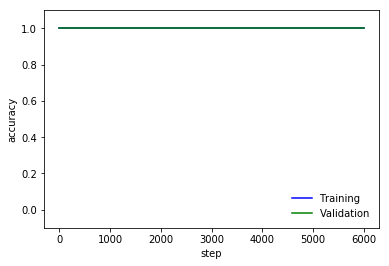

In [311]:
if(VALIDATION_SIZE):
    true_ys = np.reshape(validation_labels,(validation_labels.size,1))
    validation_accuracy = accuracy.eval(feed_dict={x: validation_rows[:75], y_: true_ys[:75], keep_prob: 1.0})
    print('validation_accuracy => %.4f'%validation_accuracy)
    plt.plot(x_range, train_accuracies,'-b', label='Training')
    plt.plot(x_range, validation_accuracies,'-g', label='Validation')
    plt.legend(loc='lower right', frameon=False)
    plt.ylim(ymax = 1.1, ymin = -0.1)
    plt.ylabel('accuracy')
    plt.xlabel('step')
    if GRAPH:
        plt.show()

In [313]:
# predict test set
predicted_labels = predict.eval(feed_dict={x: test_rows[:75], keep_prob: 1.0})

In [315]:
# batch hyperparameter is more resource efficient
predicted_labels = np.zeros(test_rows.shape[0])
for i in range(0,test_rows.shape[0]//BATCH_SIZE):
    predicted_labels[i*BATCH_SIZE : (i+1)*BATCH_SIZE] = predict.eval(feed_dict={
                       x: test_rows[i*BATCH_SIZE : (i+1)*BATCH_SIZE], keep_prob: 1.0})

if DEBUG:
    print('predicted_labels({0})'.format(len(predicted_labels)))
    print(predicted_labels)

In [316]:
sess.close()

## SATURDAY SPECIAL EDITION

![](coding_Cat.png)

This addition in direct response to my Thursday 20 July in-class presentation.  Although a Data Dictionary was not provided with this dataset, I followed the next best thing -- predict on the most important features of the dataset(although it is unknown what they ultimately mean).  Thus, if a dictionary was provided in the future, we would get the accuracy on the most important features on the dataset. -- rb

In [6]:
import pandas as pd
import numpy as np
import xgboost as xgb
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

In [4]:
# Read data
df_train = pd.read_csv("train.csv", index_col='ID')
feature_cols = list(df_train.columns)
feature_cols.remove("TARGET")
df_test = pd.read_csv("test.csv", index_col='ID')

# Split up the data
X_all = df_train[feature_cols]
y_all = df_train["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.3, random_state=5, stratify=y_all)

In [7]:
# Get top features from xgb model
model = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=9,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=5
)

# Train cv
xgb_param = model.get_xgb_params()
dtrain = xgb.DMatrix(X_train.values, label=y_train.values, missing=np.nan)
cv_result = xgb.cv(
    xgb_param,
    dtrain,
    num_boost_round=model.get_params()['n_estimators'],
    nfold=5,
    metrics=['auc'],
    early_stopping_rounds=50)
best_n_estimators = cv_result.shape[0]
model.set_params(n_estimators=best_n_estimators)

# Train model
model.fit(X_train, y_train, eval_metric='auc')

# Predict training data
y_hat_train = model.predict(X_train)

# Predict test data
y_hat_test = model.predict(X_test)

# Print model report:
print("\nModel Report")
print("best n_estimators: {}".format(best_n_estimators))
print("AUC Score (Train): %f" % roc_auc_score(y_train, y_hat_train))
print("AUC Score (Test) : %f" % roc_auc_score(y_test,  y_hat_test))


Model Report
best n_estimators: 65
AUC Score (Train): 0.867708
AUC Score (Test) : 0.840538


In [8]:
# Get important features
feat_imp = list(pd.Series(model.booster().get_fscore()).sort_values(ascending=False).index)

In [9]:
# Even out the targets
df_train_1 = df_train[df_train["TARGET"] == 1]
df_train_0 = df_train[df_train["TARGET"] == 0].head(df_train_1.shape[0])
df_train = df_train_1.append(df_train_0)

# Scale data
X_all = df_train[feat_imp].copy(deep=True)
y_all = df_train["TARGET"]
X_all[feat_imp] = sklearn.preprocessing.scale(X_all, axis=0, with_mean=True, with_std=True, copy=True)
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.3, random_state=5, stratify=y_all)

# Create second complementary column at position 0
y_train_2cols = np.array(list(zip((1 - y_train).values, y_train.values)))

/Users/x/anaconda/envs/dl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [10]:
# Tensorflow Model
import tensorflow as tf

# Hyperparameters
n_steps = 3001
batch_size = 200
learning_rate0 = 0.05
decay_steps = 500
decay_rate = 0.8

# Network parameters
n_h1 = 20
n_h2 = 20
n_features = X_train.shape[1]
n_labels = 2

# L2 regularization
beta = 1e-5

# Dropout
keep_prob = 0.5

graph = tf.Graph()
with graph.as_default():
    # Allocate variables
    tf_X_train = tf.placeholder(tf.float32, shape=(batch_size, n_features))
    tf_y_train = tf.placeholder(tf.float32, shape=(batch_size, n_labels))
    tf_X_test = tf.constant(X_test.values, dtype=tf.float32)
    
    tf_keep_prob = tf.placeholder(tf.float32)
    
    # Hidden layer
    with tf.name_scope('h1') as scope:
        weights_h1 = tf.Variable(
            tf.truncated_normal(
                [n_features, n_h1],
                stddev=1.0 / np.sqrt(n_features)
        ), name='weights_h1')
        biases_h1 = tf.Variable(tf.zeros([n_h1]), name='biases_h1')        
        h1 = tf.nn.relu(tf.matmul(tf_X_train, weights_h1) + biases_h1)

        # Dropout
        h1 = tf.nn.dropout(h1, tf_keep_prob)
        
    # Hidden layer 2
    with tf.name_scope('h2') as scope:
        weights_h2 = tf.Variable(
            tf.truncated_normal(
                [n_h1, n_h2],
                stddev=1.0 / np.sqrt(n_h1)
        ), name='weights_h2')
        biases_h2 = tf.Variable(tf.zeros([n_h2]), name='biases_h2')
        h2 = tf.nn.relu(tf.matmul(h1, weights_h2) + biases_h2)

        # Dropout
        h2 = tf.nn.dropout(h2, tf_keep_prob)
        
    # Output layer
    with tf.name_scope('softmax_linear'):
        weights_out = tf.Variable(
            tf.truncated_normal(
                [n_h2, n_labels],
                stddev=1.0 / np.sqrt(n_h2)
            ), name='weights_out')
        biases_out = tf.Variable(tf.zeros([n_labels]), name='biases_out')
        logits = tf.matmul(h2, weights_out) + biases_out

    # Training computation.
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf_y_train))
    
    # L2 Regularization
    #loss += beta * (tf.nn.l2_loss(weights_h1) + tf.nn.l2_loss(weights_h2) + tf.nn.l2_loss(weights_out))

    # Optimizer
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(
        learning_rate0, global_step, decay_steps, decay_rate, staircase=False)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
    
    # Predictions for the training and test datasets.
    yhat_train = tf.nn.softmax(logits)
    yhat_test = tf.nn.relu(tf.matmul(tf_X_test, weights_h1) + biases_h1)
    yhat_test = tf.nn.relu(tf.matmul(yhat_test, weights_h2) + biases_h2)
    yhat_test = tf.nn.softmax(tf.matmul(yhat_test, weights_out) + biases_out)
    
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    for step in range(n_steps):    
        _batch_idx = np.random.choice(X_train.shape[0], size=batch_size, replace=False)
        batch_X = X_train.values[_batch_idx, :]
        batch_y = y_train_2cols[_batch_idx, :]

        # Prepare a dictionary telling the session where to feed the minibatch.
        feed_dict = {
            tf_X_train: batch_X,
            tf_y_train: batch_y,
            tf_keep_prob: keep_prob
        }
        _, l, pred = session.run([optimizer, loss, yhat_train], feed_dict=feed_dict)
        if (step % 500 == 0):
            print("Batch loss at step {0:d}: {1:.6f}".format(step, l))
            print("Batch score: {0:.6f}".format(roc_auc_score(batch_y[:, 1], pred[:, 1])))
            print("Test score: {0:.6f}".format(roc_auc_score(y_test.values, yhat_test.eval()[:, 1])))
    print("Final Test score: {0:.6f}".format(roc_auc_score(y_test.values, yhat_test.eval()[:, 1])))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Batch loss at step 0: 0.717138
Batch score: 0.539554
Test score: 0.510889
Batch loss at step 500: 0.604797
Batch score: 0.746547
Test score: 0.786932
Batch loss at step 1000: 0.580655
Batch score: 0.747061
Test score: 0.802625
Batch loss at step 1500: 0.620887
Batch score: 0.741010
Test score: 0.807610
Batch loss at step 2000: 0.596551
Batch score: 0.772100
Test score: 0.810459
Batch loss at step 2500: 0.614841
Batch score: 0.746477
Test score: 0.811980
Batch loss at step 3000: 0.544632
Batch score: 0.808586
Test score: 0.811915
Final Test score: 0.811915


## MLP predictions on Important Features:
XGBoost was used as a tool to select the Important Fetures from the given dataset.  Thereafter, Tensorflow help predict on those selected features. The concluding final accuracy on the prediction is 0.81 -- which is still not as accurate at the XGBoost model as a stand alone ML model.  

This again, confirms the notion, that NNs are not necessary the end-all solution

![](spanishMap.png)

# Alternative -
# Tensorflow Wrapper Exploration
# XG BOOST

In [72]:
import xgboost as xgb
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

In [73]:
# Read data
xgdf_train = pd.read_csv('train.csv', index_col='ID')
feature_cols = list(xgdf_train.columns)
feature_cols.remove("TARGET")
xgdf_test = pd.read_csv('test.csv', index_col='ID')

# Split up the data
X_all = xgdf_train[feature_cols]
y_all = xgdf_train["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.3, random_state=5, stratify=y_all)

In [74]:
# Get top features from xgb model
model = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=9,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=5
)

In [75]:
# Train cv
xgb_param = model.get_xgb_params()
dtrain = xgb.DMatrix(X_train.values, label=y_train.values, missing=np.nan)
cv_result = xgb.cv(
    xgb_param,
    dtrain,
    num_boost_round=model.get_params()['n_estimators'],
    nfold=5,
    metrics=['auc'],
    early_stopping_rounds=50)
best_n_estimators = cv_result.shape[0]
model.set_params(n_estimators=best_n_estimators)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=9, missing=None, n_estimators=65, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=5, silent=True, subsample=0.8)

In [77]:
# Train model
model.fit(X_train, y_train, eval_metric='auc')

# Predict training data
y_hat_train = model.predict(X_train)

# Predict test data
y_hat_test = model.predict(X_test)

In [78]:
# Print model report:
print("\nModel Report")
print("best n_estimators: {}".format(best_n_estimators))
print("AUC Score (Train): %f" % roc_auc_score(y_train, y_hat_train))
print("AUC Score (Test) : %f" % roc_auc_score(y_test,  y_hat_test))


Model Report
best n_estimators: 65
AUC Score (Train): 0.867708
AUC Score (Test) : 0.840538


In [79]:
# Get important features
feat_imp = list(pd.Series(model.booster().get_fscore()).sort_values(ascending=False).index)

In [80]:
# Even out the targets
df_train_1 = xgdf_train[xgdf_train["TARGET"] == 1]
df_train_0 = xgdf_train[xgdf_train["TARGET"] == 0].head(df_train_1.shape[0])
xgdf_train = df_train_1.append(df_train_0)

# Scale data
X_all = xgdf_train[feat_imp].copy(deep=True)
y_all = xgdf_train["TARGET"]
X_all[feat_imp] = sklearn.preprocessing.scale(X_all, axis=0, with_mean=True, with_std=True, copy=True)
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.3, random_state=5, stratify=y_all)

# Create second complementary column at position 0
y_train_2cols = np.array(list(zip((1 - y_train).values, y_train.values)))

/Users/x/anaconda/envs/dl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [81]:
# Tensorflow Model
import tensorflow as tf

In [82]:
# Hyperparameters
n_steps = 3001
batch_size = 200
learning_rate0 = 0.05
decay_steps = 500
decay_rate = 0.8

# Network parameters
n_h1 = 20
n_h2 = 20
n_features = X_train.shape[1]
n_labels = 2

In [83]:
# L2 regularization
beta = 1e-5

In [84]:
# Tensorflow Model
import tensorflow as tf

# Hyperparameters
n_steps = 3001
batch_size = 200
learning_rate0 = 0.05
decay_steps = 500
decay_rate = 0.8

# Network parameters
n_h1 = 20
n_h2 = 20
n_features = X_train.shape[1]
n_labels = 2

# L2 regularization
beta = 1e-5

# Dropout
keep_prob = 0.5

graph = tf.Graph()
with graph.as_default():
    # Allocate variables
    tf_X_train = tf.placeholder(tf.float32, shape=(batch_size, n_features))
    tf_y_train = tf.placeholder(tf.float32, shape=(batch_size, n_labels))
    tf_X_test = tf.constant(X_test.values, dtype=tf.float32)
    
    tf_keep_prob = tf.placeholder(tf.float32)
    
    # Hidden layer
    with tf.name_scope('h1') as scope:
        weights_h1 = tf.Variable(
            tf.truncated_normal(
                [n_features, n_h1],
                stddev=1.0 / np.sqrt(n_features)
        ), name='weights_h1')
        biases_h1 = tf.Variable(tf.zeros([n_h1]), name='biases_h1')        
        h1 = tf.nn.relu(tf.matmul(tf_X_train, weights_h1) + biases_h1)

        # Dropout
        h1 = tf.nn.dropout(h1, tf_keep_prob)
        
    # Hidden layer 2
    with tf.name_scope('h2') as scope:
        weights_h2 = tf.Variable(
            tf.truncated_normal(
                [n_h1, n_h2],
                stddev=1.0 / np.sqrt(n_h1)
        ), name='weights_h2')
        biases_h2 = tf.Variable(tf.zeros([n_h2]), name='biases_h2')
        h2 = tf.nn.relu(tf.matmul(h1, weights_h2) + biases_h2)

        # Dropout
        h2 = tf.nn.dropout(h2, tf_keep_prob)
        
    # Output layer
    with tf.name_scope('softmax_linear'):
        weights_out = tf.Variable(
            tf.truncated_normal(
                [n_h2, n_labels],
                stddev=1.0 / np.sqrt(n_h2)
            ), name='weights_out')
        biases_out = tf.Variable(tf.zeros([n_labels]), name='biases_out')
        logits = tf.matmul(h2, weights_out) + biases_out

   # Training computation.
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_y_train))
    
    # L2 Regularization
    #loss += beta * (tf.nn.l2_loss(weights_h1) + tf.nn.l2_loss(weights_h2) + tf.nn.l2_loss(weights_out))

    # Optimizer
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(
        learning_rate0, global_step, decay_steps, decay_rate, staircase=False)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
    
    # Predictions for the training and test datasets.
    yhat_train = tf.nn.softmax(logits)
    yhat_test = tf.nn.relu(tf.matmul(tf_X_test, weights_h1) + biases_h1)
    yhat_test = tf.nn.relu(tf.matmul(yhat_test, weights_h2) + biases_h2)
    yhat_test = tf.nn.softmax(tf.matmul(yhat_test, weights_out) + biases_out)
    
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    for step in range(n_steps):    
        _batch_idx = np.random.choice(X_train.shape[0], size=batch_size, replace=False)
        batch_X = X_train.values[_batch_idx, :]
        batch_y = y_train_2cols[_batch_idx, :]

        # Prepare a dictionary telling the session where to feed the minibatch.
        feed_dict = {
            tf_X_train: batch_X,
            tf_y_train: batch_y,
            tf_keep_prob: keep_prob
        }
        _, l, pred = session.run([optimizer, loss, yhat_train], feed_dict=feed_dict)
        if (step % 500 == 0):
            print("Batch loss at step {0:d}: {1:.6f}".format(step, l))
            print("Batch score: {0:.6f}".format(roc_auc_score(batch_y[:, 1], pred[:, 1])))
            print("Test score: {0:.6f}".format(roc_auc_score(y_test.values, yhat_test.eval()[:, 1])))
    print("Final Test score: {0:.6f}".format(roc_auc_score(y_test.values, yhat_test.eval()[:, 1])))

ValueError: Only call `softmax_cross_entropy_with_logits` with named arguments (labels=..., logits=..., ...)

![](altaMira.png)

# CONCLUSION

The process if applying different models for use with the Santander dataset is more about the journey of exploration in machine learning as opposed to searching for a neural network model as the best model for prediction.  Many dos and don'ts were explored along the way


Indeed, the questions that are posed with this project help crystalize that greater understanding of machine learning processes:

WHAT WAS THE BIGGEST CHALLENGE/OBSTACLE HURDLE? DATA? MODELING? TRAINING?

Given hindsight, the biggest obstacle was the data.  The dataset was relatively small and not ideally suited for a neural network model.  Although “top features” were extracted by given packages, there was no index or "Data Dictionary" given to accompany the features with the dataset to gain further insight on the data itself.    A general understanding is that finding good inputs and collecting enough training data take considerable time and effort than training a neural network.  

Moreover, understanding batch sizes for training sets appears to require some mystical black magic that I hope to decipher with greater experience.  Through some rough experience above, I found smaller batch sizes to work for me for this project.

IF YOU HAD TWO MORE WEEKS - WHAT WOULD YOU DO?

If given two more weeks, I would spend considerably more time to understand the dataset better.  With a better understanding upfront, I would feel more confident with satisfactorily tuning the hyperparameters.  Moreover, I would be more cognizant of overfitting the training data for the nn MLP model that I was working on so as to improve the general model.  The XGBoost model also requires a better, experienced intuition with higher variance and lower bias.

DOES IT SCALE?

The best model for the dataset was determined to be the XGBoost.  As XGBoost’s base learners are trees, any monotonic function of any feature variable will have not effect on how the trees are formed.  Thus, scaling for XGBoost is unnecessary.  

HOW WOULD YOU TURN YOUR PROJECT TO A DATA PROJECT?

The XGBoost model developed with this project would work well in mitigating or eliminating customer churn by Santander’s online and offline customers.  The derived model can facilitate targeting marketing to potentially churning or dissatisfied customers in the effort to keep their business by personal improving their customer experience with targeted bank promotions and improved positive experiences.

WHY DOES YOUR DEEP LEARNING MODEL BEAT YOUR BASELINE?

NO- the MLP deep learning model does not beat the baseline model of XGBoost.  XGBoost does a great job for the given Santander Banking data.  From what I best understand by the literature, when you don’t have large amounts of training examples, like in the 100k to 1000k range, then those alternatives to deep learning methods are superior in performance (as they don’t overfit, are often computationally superior to begin with). Thus, the Santander customer satisfaction data set of about 76k observations and about 300 features is ideally suited for machine learning as opposed to deep learning.  Illustratively, as the Santander dataset lacks image data and rich text data, deep learning models are not necessary.  It should be added that the Santander data set had already converted many text sentiment to some characteristic numerical representation.

WHAT ARE YOUR TRADEOFFS BETWEEN YOUR BASELINE AND YOUR DEEP LEARNING MODEL? WOULD YOU PUT YOUR DEEP LEARNING MODEL INTO PRODUCTION OVER YOUR BASELINE? WHY OR WHY NOT?

As the Santander dataset ultimately seeks classification as either favorable or unfavorable customer response, the balance of tradeoffs between a baseline machine learning model and a deep learning model are quite stark, and greatly depends on the what solutions are specifically being sought.  Given the predefined features already provided by the Santander dataset, classification is straightforward and requires a minimal computational footprint especially because much of the text was already numerically converted.  The standard baseline model, such as with XGBoost, is ideal for commercial production because it provides the needed sentiment classification at minimal computational power and speed – therefore achieving quick answers at low cost.
On the other hand, a deep model would have been ideal if Santander would have alternatively provided characteristically different data for sentiment classification such as: 1) image data of actual customers either happily or angrily interacting with their bank app or atms; or 2) a vast Santander datalake full of Tweets, Instagram or IoT/wearable harvested data in many languages that Santander bank services for customer classification satisfaction.


WHAT EVIDENCE CAN YOU PROVIDE THAT YOUR MODEL HAS GENERALIZED CORRECTLY?

If the output of the test case is close to that of the past training cases, this should provide evidence that my model has generalized correctly.

ARE YOUR RESULTS SIGNIFICANT?

Assuming the mathematical sense of "significant":
1) Yes, the results are statistically significant as my model results are not attibutable to chance.
2) Arbuably yes, the results are practically significant based on the size of the difference is meaningful - in that I was able to successfully get my NN tensorflow model to run with smaller batch sizes with results that do indeed overcome underlying noise.


WHAT HYPERPARAMETERS MATTERED? WHICH DIDN'T?  

Here's a laundry list of some hyperparameters that I can identify:  Batch Size, Training Epochs, Learning Rates, Dropout, Convolutional size, number of layers.  
WHAT HYPERPARAMETERS MATTERED?  A great way to test for this is to adjust one hyperparameter at a time so that the training output becomes less accurate.  I found my model only worked with smaller batch sizes but training accuracy decreased with decreasing size most likely due to noise.  Training epochs and learning rates tended not to have such a strong effect on the entire model as batch size (at least in the Tensorflow universe).

WHICH DIDN'T? Layer Numbers in that I did not experiment with multiple numbers for my model.  Dropout was too problematical for my model to execute as well although it is a nice and easy way to prevent overfitting.  In action, a dropout layer randomly removes some nodes in the network permitting the nodes to become less sensitive and work robustly well with different combinations within the hidden layer.  Recall the wonderful analogy of the construction workers who randomly called in sick:  https://chatbotslife.com/regularization-in-deep-learning-f649a45d6e0 




WHY DID OR DIDN'T YOU USE ACCURACY AS YOUR EVALUATION METRIC?

I used accuracy as my evaluation metric to afford greater paredy between my tensorflow model and sklearn model or sklearn ensemble results. For evaluating any classifier is the confusion matrix as Accuracy, precision, and F-score is captured.  Other metrics are area under the ROC curve and area under the ROC curve. (PS: during this reflection, I've just realized that I have applied the same formula to loss and accuracy in my tensorflow model).

![](portSantander.png)

Thank you for your interest and for a fun semester!